データサイエンス基礎 第14回 数値解析におけるモンテカルロ法 シミュレーションで円周率を計算

In [2]:
import math
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.stats import qmc

100 samples: in:76 out:24 all:100 Pi: 3.04
1000 samples: in:774 out:226 all:1000 Pi: 3.096
10000 samples: in:7879 out:2121 all:10000 Pi: 3.1516
100000 samples: in:78467 out:21533 all:100000 Pi: 3.13868


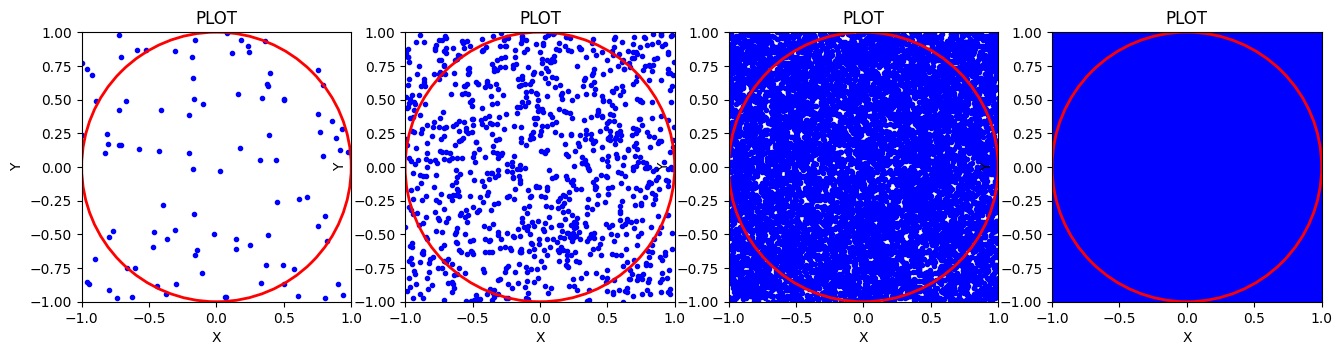

100 samples: in:69 out:31 all:100 Pi: 2.76
1000 samples: in:786 out:214 all:1000 Pi: 3.144
10000 samples: in:7847 out:2153 all:10000 Pi: 3.1388
100000 samples: in:78734 out:21266 all:100000 Pi: 3.14936


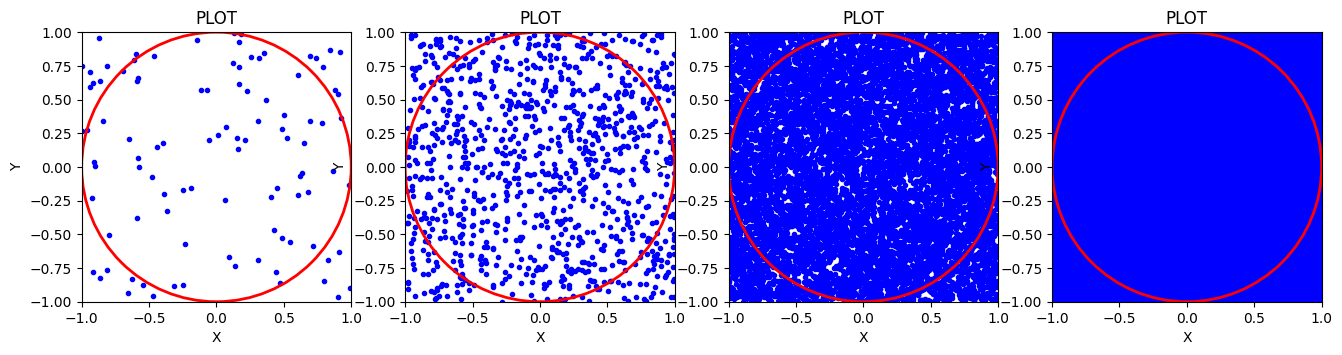

100 samples: in:79 out:21 all:100 Pi: 3.16
1000 samples: in:792 out:208 all:1000 Pi: 3.168
10000 samples: in:7836 out:2164 all:10000 Pi: 3.1344
100000 samples: in:78560 out:21440 all:100000 Pi: 3.1424


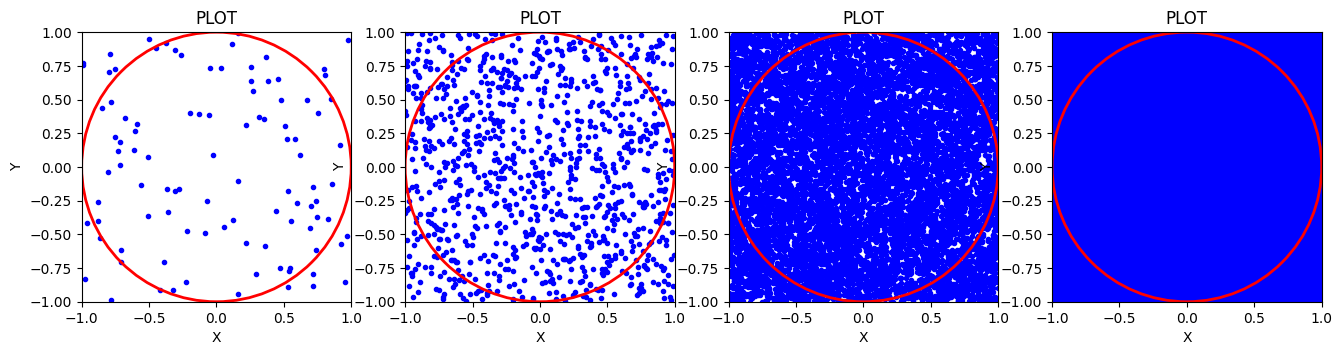

100 samples: in:82 out:18 all:100 Pi: 3.28
1000 samples: in:793 out:207 all:1000 Pi: 3.172
10000 samples: in:7846 out:2154 all:10000 Pi: 3.1384
100000 samples: in:78477 out:21523 all:100000 Pi: 3.13908


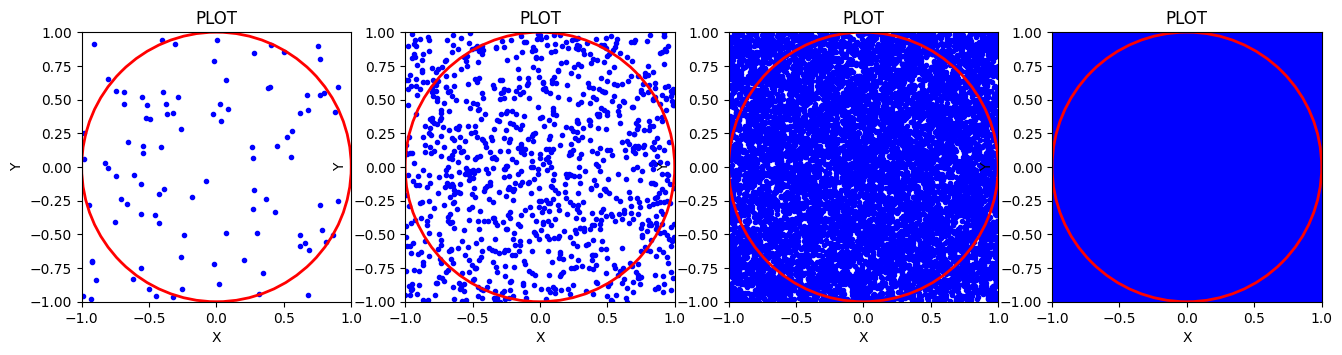

100 samples: in:75 out:25 all:100 Pi: 3.0
1000 samples: in:774 out:226 all:1000 Pi: 3.096
10000 samples: in:7823 out:2177 all:10000 Pi: 3.1292
100000 samples: in:78697 out:21303 all:100000 Pi: 3.14788


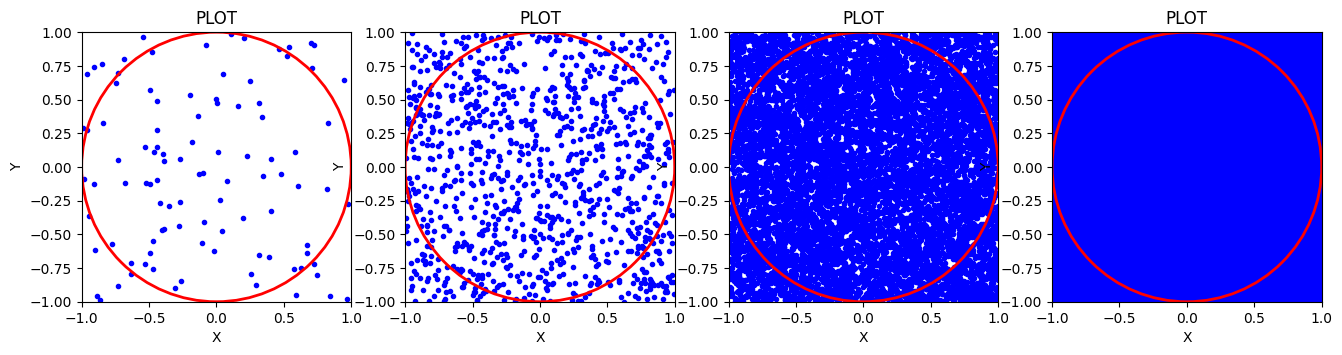

In [11]:
N_array = [100, 1000, 10000, 100000] # 試行回数を設定
trial = 5  # 上記の試行回数で N 回実験
random.seed(seed=1) # 乱数のシードを設定する

for j in range(trial):
    fig = plt.figure(figsize=(16, 4))
    for i in range(len(N_array)):
        N = N_array[i]
        N_in = 0
        N_out = 0
        ran_x = random.rand(N) * 2.0 - 1.0 # X の乱数 (-1.0 - 1.0)
        ran_y = random.rand(N) * 2.0 - 1.0  # Y の乱数 (-1.0 - 1.0)
        ran_point = np.hypot(ran_x,ran_y) # X^2 + Y^2の平方根

        for j in ran_point:
            if j <= 1:
                N_in += 1
            else:
                N_out += 1
        Pie = N_in/N*4

        print(f'{N_array[i]} samples: in:{N_in} out:{N_out} all:{N} Pi: {Pie}')

        ax = fig.add_subplot(1, len(N_array), i+1)
        ax.axis("scaled")
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_title("PLOT")
        ax.scatter(ran_x, ran_y, marker=".", color = "blue", label = "POINT")
        c1 = plt.Circle((0, 0), radius=1, fc="None", ec="r", linewidth=2, color = "black")
        ax.add_patch(c1)

    plt.show()


In [4]:
# 各試行回数で1000回試行した結果を記録
N_array = [100, 1000, 10000, 100000] # 試行回数を設定
_sim_result = [[], [], [], []] # 結果を記録するリスト
trial = 10000  # 上記の試行回数で N 回実験

random.seed(seed=1) # 乱数のシードを設定する

for j in range(trial):
    for i in range(len(N_array)):
        N = N_array[i]
        N_in = 0
        N_out = 0
        ran_x = random.rand(N) * 2.0 - 1.0 # X の乱数 (-1.0 - 1.0)
        ran_y = random.rand(N) * 2.0 - 1.0  # Y の乱数 (-1.0 - 1.0)
        ran_point = np.hypot(ran_x,ran_y) # X^2 + Y^2の平方根
        for j in ran_point:
            if j <= 1:
                N_in += 1
            else:
                N_out += 1
        _sim_result[i].append(N_in/N*4)

In [5]:
# 最も円周率に近い結果を表示
for i in range(len(N_array)):
    _best_result = 0.0
    for _result in _sim_result[i]:
        if abs(_result - np.pi) < abs(_best_result - np.pi):
            _best_result = _result
    print(f'{N_array[i]}回試行を{trial}回実施： ' + 
          f'{_best_result:.06f} ({(_best_result-np.pi):.06f})')


100回試行を10000回実施： 3.160000 (0.018407)
1000回試行を10000回実施： 3.140000 (-0.001593)
10000回試行を10000回実施： 3.141600 (0.000007)
100000回試行を10000回実施： 3.141600 (0.000007)


100回試行を100000回実施： 平均 3.14039200 (-0.00120065) 標準偏差 0.16473933
1000回試行を100000回実施： 平均 3.14185040 (0.00025775) 標準偏差 0.05204546
10000回試行を100000回実施： 平均 3.14151016 (-0.00008249) 標準偏差 0.01626087
100000回試行を100000回実施： 平均 3.14169423 (0.00010157) 標準偏差 0.00516275


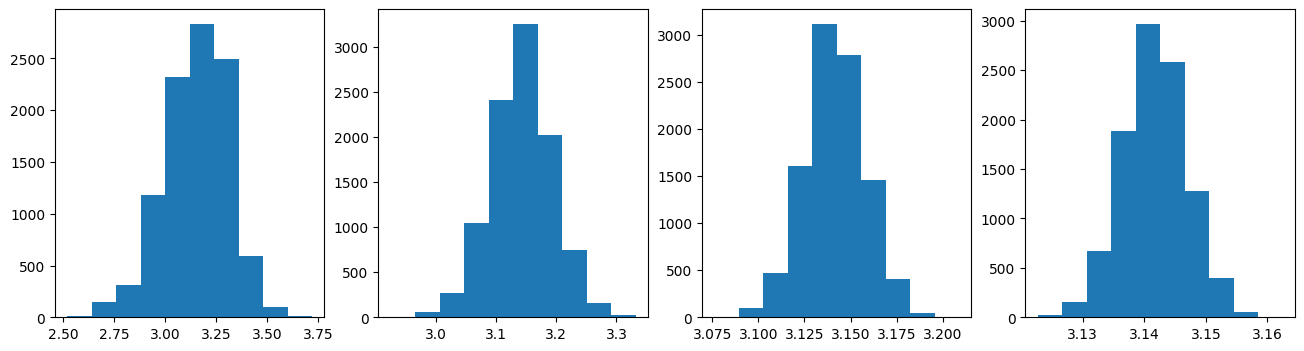

In [6]:
# 各試行回数で1000回試行した結果の平均、分散、標準偏差、ヒストグラムを表示
fig = plt.figure(figsize=(16, 4))
for i in range(len(N_array)):
    ax = fig.add_subplot(1, len(N_array), i+1)
    ax.hist(_sim_result[i])
    _np_array = np.array(_sim_result[i])
    print(f'{N_array[i]}回試行を{N}回実施： ' +
          f'平均 {_np_array.mean():.08f} ({(_np_array.mean()-np.pi):.08f}) ' +
          f'標準偏差 {_np_array.std():.08f}')
plt.show()

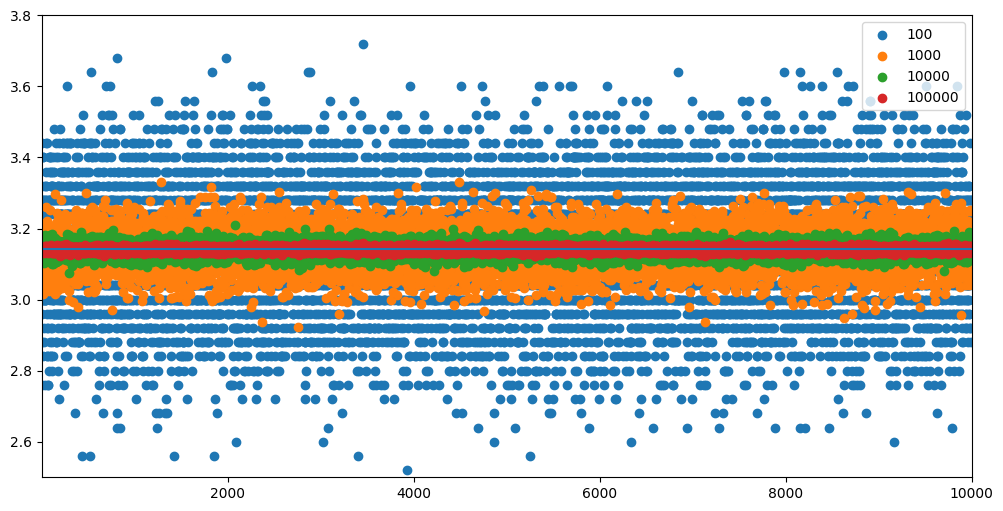

In [7]:
# 各試行回数で1000回試行した結果をプロット
fig = plt.figure(figsize=(12, 6))
_x = range(1,trial+1)
for i in range(len(N_array)):
    plt.scatter(_x, _sim_result[i], label = f"{N_array[i]}")
plt.hlines(np.pi, 1, trial)
plt.legend()
plt.xlim(1, trial+1)
plt.ylim(2.5, 3.8)
plt.show()

100 samples: in:81 out:40 all:100 Pi: 3.24
400 samples: in:317 out:124 all:400 Pi: 3.17
2500 samples: in:1961 out:640 all:2500 Pi: 3.1376


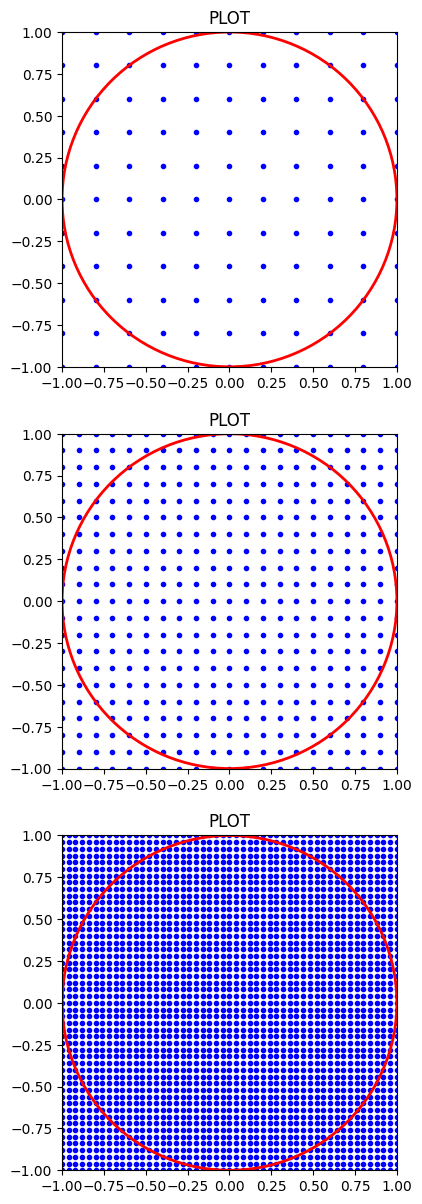

In [19]:
#格子点を利用した円周率の計算
grid = [10, 20, 50] # x軸、y軸の点数
fig = plt.figure(figsize=(6, 20))
for i in range(len(grid)):
    N_in = 0
    N_out = 0
    _grid = grid[i]
    _x_grid = np.linspace(-1, 1, _grid+1) # X軸上の格子点を作成
    _y_grid = np.linspace(-1, 1, _grid+1) # Y軸上の格子点を作成

    for _x in _x_grid:
        for _y in _y_grid:
            _d = np.sqrt(_x * _x + _y * _y)
            if _d <= 1:
                N_in += 1
            else:
                N_out += 1
    Pie = N_in/(_grid*_grid)*4

    print(f'{_grid*_grid} samples: in:{N_in} out:{N_out} all:{_grid*_grid} Pi: {Pie}')

    ax = fig.add_subplot(len(N_array), 1, i+1)
    ax.axis("scaled")
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_title("PLOT")
    _x_mesh, _y_mesh = np.meshgrid(_x_grid, _y_grid)
    ax.scatter(_x_mesh, _y_mesh, marker=".", color = "blue", label = "POINT")
    c1 = plt.Circle((0, 0), radius=1, fc="None", ec="r", linewidth=2, color = "black")
    ax.add_patch(c1)

plt.show()


In [9]:
#格子点を利用した円周率の計算
grid = [10, 100, 1000, 10000] # x軸、y軸の点数
for i in range(len(grid)):
    N_in = 0
    N_out = 0
    _grid = grid[i]
    _x_grid = np.linspace(-1, 1, _grid+1) # X軸上の格子点を作成
    _y_grid = np.linspace(-1, 1, _grid+1) # Y軸上の格子点を作成

    for _x in _x_grid:
        for _y in _y_grid:
            _d = np.sqrt(_x * _x + _y * _y)
            if _d <= 1:
                N_in += 1
            else:
                N_out += 1
    Pie = N_in/(_grid*_grid)*4

    print(f'{_grid*_grid} samples: in:{N_in} out:{N_out} all:{_grid*_grid} Pi: {Pie}')


100 samples: in:81 out:40 all:100 Pi: 3.24
10000 samples: in:7845 out:2356 all:10000 Pi: 3.138
1000000 samples: in:785349 out:216652 all:1000000 Pi: 3.141396
100000000 samples: in:78539673 out:21480328 all:100000000 Pi: 3.14158692


100 samples: in:78 out:22 all:100 Pi: 3.12
400 samples: in:313 out:87 all:400 Pi: 3.13
2500 samples: in:1972 out:528 all:2500 Pi: 3.1552


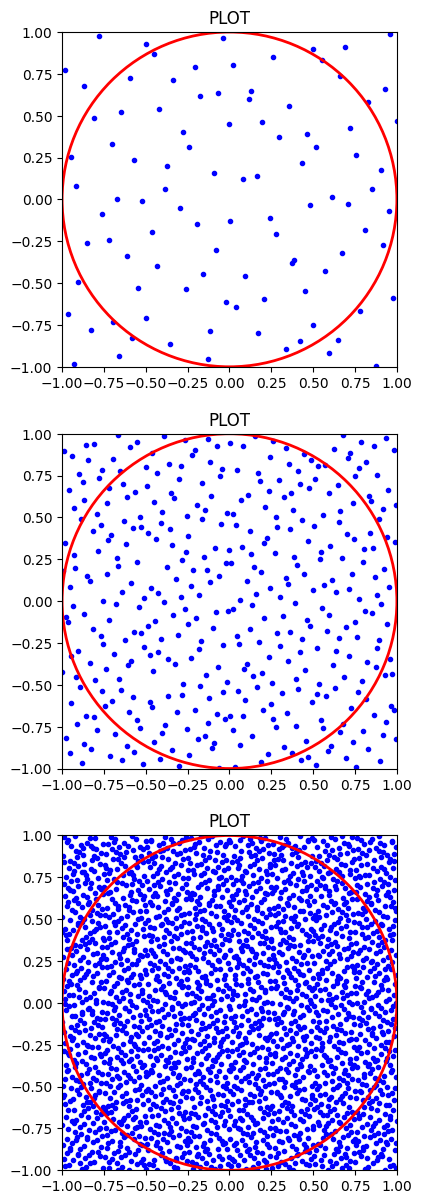

In [20]:
# 準乱数系列(Sobol系列)を利用した円周率の計算
grid = [10, 20, 50] # x軸、y軸の点数
fig = plt.figure(figsize=(6, 20))
for i in range(len(grid)):
    N_in = 0
    N_out = 0
    _grid = grid[i]
    sampler = qmc.Sobol(d=2, scramble=True)  # Sobol系列のサンプラーを作成
    samples = sampler.random(n=_grid*_grid)  # _grid * _grid 個
    
    ax = fig.add_subplot(len(N_array), 1, i+1)
    ax.axis("scaled")
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_title("PLOT")

    for sample in samples:
        _x, _y = sample
        _x = _x * 2.0 - 1.0
        _y = _y * 2.0 - 1.0
        ax.scatter(_x, _y, marker=".", color = "blue", label = "POINT")
        _d = np.sqrt(_x * _x + _y * _y)
        if _d <= 1:
            N_in += 1
        else:
            N_out += 1
    Pie = N_in/(_grid*_grid)*4
    print(f'{_grid*_grid} samples: in:{N_in} out:{N_out} all:{_grid*_grid} Pi: {Pie}')

    c1 = plt.Circle((0, 0), radius=1, fc="None", ec="r", linewidth=2, color = "black")
    ax.add_patch(c1)

plt.show()

In [17]:
# 準乱数系列(Sobol系列)を利用した円周率の計算
grid = [10, 100, 1000, 10000] # x軸、y軸の点数
for i in range(len(grid)):
    N_in = 0
    N_out = 0
    _grid = grid[i]
    sampler = qmc.Sobol(d=2, scramble=True)  # Sobol系列のサンプラーを作成
    samples = sampler.random(n=_grid*_grid)  # _grid * _grid 個
    
    for sample in samples:
        _x, _y = sample
        _x = _x * 2.0 - 1.0
        _y = _y * 2.0 - 1.0
        _d = np.sqrt(_x * _x + _y * _y)
        if _d <= 1:
            N_in += 1
        else:
            N_out += 1
    Pie = N_in/(_grid*_grid)*4

    print(f'{_grid*_grid} samples: in:{N_in} out:{N_out} all:{_grid*_grid} Pi: {Pie}')

100 samples: in:78 out:22 all:100 Pi: 3.12
10000 samples: in:7855 out:2145 all:10000 Pi: 3.142
1000000 samples: in:785397 out:214603 all:1000000 Pi: 3.141588
100000000 samples: in:78539859 out:21460141 all:100000000 Pi: 3.14159436
